dejong1：

function y = dejong1(x1, x2)

y = x1.^2 + x2.^2;

end

% -5.12<= x <= 5.12

dejong2：

function y = dejong2(x1, x2)

y = 100*(x1.^2 - x2).^2 + (1-x1).^2;

end

% -2.048<= x <= 2.048

要求：设计一个遗传算法来求解 dejong1 和 dejong2 在给定范围内的最小值

[参考链接_1](https://blog.csdn.net/hsk6543210/article/details/102851210)

In [9]:
#引入需要的库
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#de_jong1问题中x的取值范围
x1_bound = [-5.12, 5.12]
x2_bound = [-5.12, 5.12]

#初始化
pop_size = 30
crossover_rate = 0.75    #交叉率
mutation_rate = 0.01    #变异率
max_generation_num = 30    #迭代次数
min_generation_num = 30
x1_precision = 5         #决策变量精度
x2_precision = 5         #目标变量精读
without_optim_tolerate = 30 # 如果持续200代最优值改善很小（1e-6）的话，提前终止迭代

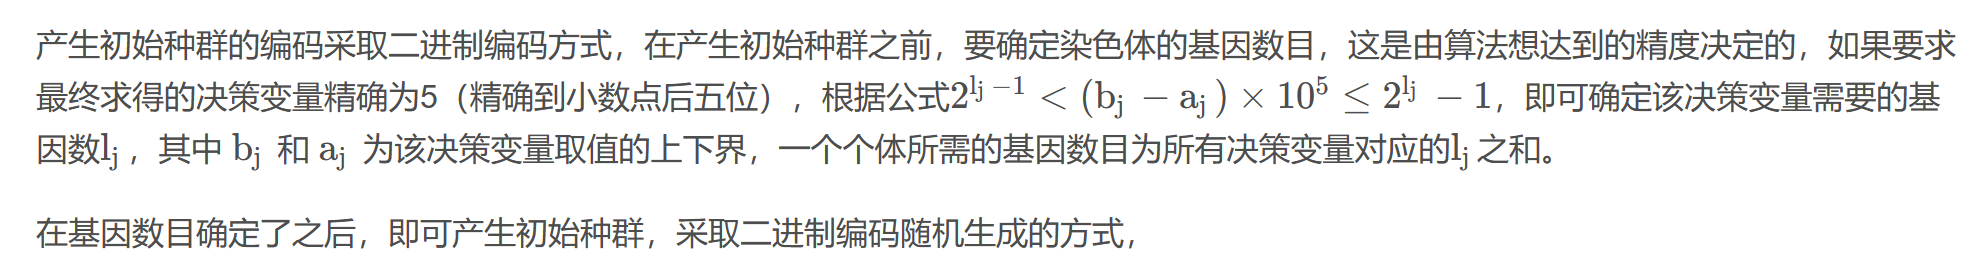

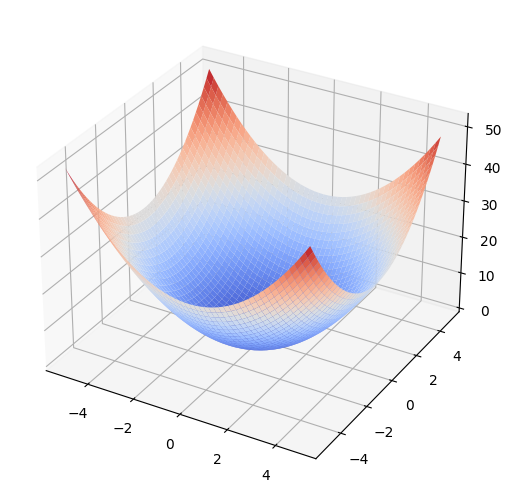

In [10]:
#确定决策变量需要的基因数
def get_DNA_size(x1_bound, x2_bound, x1_precision):
    x1_size, x2_size = 1, 1
    discrimiant_x1 = (x1_bound[1]-x1_bound[0]) * 10 ** x1_precision
    discrimiant_x2 = (x2_bound[1]-x2_bound[0]) * 10 ** x1_precision
    while 2**(x1_size-1) < discrimiant_x1:
        if discrimiant_x1 < 2 ** x1_size -1:
            break
        x1_size = x1_size + 1
    while 2**(x2_size-1) < discrimiant_x2:
        if discrimiant_x2 < 2 ** x2_size - 1:
            break
        x2_size = x2_size + 1
    
    return x1_size, x2_size

x1_size, x2_size = get_DNA_size(x1_bound, x2_bound, x1_precision)

DNA_size = x1_size + x2_size

#适应度计算，计算函数表达式的值，即y值
#题目中要求求得最小值，所以记得取负
def get_fitness(x1, x2):
    return -1 * (x1**2 + x2**2)

#将产生的二进制DNA映射到变量的取值区间
def binary_change(pop, bound, size):
    return np.around(bound[0] + pop.dot(2**np.arange(size)[: : -1])*(bound[1]-bound[0])/(2**x1_size-1), decimals = x1_precision)
#上面的代码不是很懂（二进制转十进制）

#模拟自然选择，适应度越大，越大概率被保留
def select(pop, fitness):
    idx = np.random.choice(np.arange(pop_size), size = pop_size - 1, replace = True,
                           p = (fitness + (abs(min(fitness)) if min(fitness)<0 else 0))/(fitness.sum()+abs(min(fitness)if min(fitness)<0 else 0)*pop_size))
    return pop[idx]
#仍然没看懂

#模拟交叉，生成新的子代
def crossover(parent, pop):
    if np.random.rand()<crossover_rate:
        i_ = np.random.randint(0, pop_size, size = 1)
        cross_points = np.random.randint(0, DNA_size, size = 1)
        cross_points = cross_points[0]
        return np.append(parent[0:cross_points], pop[i_, cross_points:])
    return parent

#模拟变异
def mutate(child):
    for point in range(DNA_size):
        if np.random.rand()<mutation_rate:
            child[point] = 1 if child[point]==0 else 0
    return child

pop = np.random.randint(2, size = (pop_size, DNA_size))

plt.ion()   #打开plt交互模式
fig = plt.figure()
#-------------------------------------------------------------------------------
#ax = Axes3D(fig)
#这条语句在python3.4版本之后被弃用，用以下两条指令代替
#-------------------------------------------------------------------------------
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

X1 = np.arange(x1_bound[0], x1_bound[1], (x1_bound[1]-x1_bound[0])/50)
X2 = np.arange(x2_bound[0], x2_bound[1], (x2_bound[1]-x2_bound[0])/50)
X1, X2 = np.meshgrid(X1, X2)
Y = -1 * get_fitness(X1, X2)

ax.plot_surface(X1, X2, Y, rstride = 1, cstride = 1, cmap = 'coolwarm')



在画图过程中又遇到了<Figure size 640x480 with 0 Axes>问题，奇怪奇怪，虽然我们不需要3D图

已经解决

#-------------------------------------------------------------------------------

#ax = Axes3D(fig)

#这条语句在python3.4版本之后被弃用，用以下两条指令代替

#-------------------------------------------------------------------------------

ax = Axes3D(fig,auto_add_to_figure=False)

fig.add_axes(ax)

In [11]:
#初始化我们需要保存“优良”后代的变量

best_Y = float('-inf')
worse_Y = float('inf')
best_x1, best_x2 = 0, 0
actual_generation = 0

cur_best_Y_list = []
best_Y_list = []
#best_Y_list = [-float('inf')]


for i in range(max_generation_num):
    x1 = binary_change(pop[:, 0: x1_size], x1_bound, x1_size)
    x2 = binary_change(pop[:, x1_size:], x2_bound, x2_size)
    fitness = np.around(get_fitness(x1, x2), decimals = x2_precision)
    
    cur_best_x1 = binary_change(pop[np.argmax(fitness),0:x1_size], x1_bound, x1_size)
    cur_best_x2 = binary_change(pop[np.argmax(fitness),x1_size: ], x2_bound, x2_size)
    #这两个为什么不一样呢
    #print("generation:", i + 1)     #第几代
    #print("most fitted DNA: ", pop[np.argmax(fitness), :])      #最适应的DNA序列
    #print("var corresponding to most fitted DNA: ", cur_best_x1, cur_best_x2)
    #
    #print("Y_values corresponding to DNA: ", -1 * fitness[np.argmax(fitness)])
    #print("best Y_value is",  -1 * best_Y)
    #
    if fitness[np.argmax(fitness)] > best_Y:
        best_Y = fitness[np.argmax(fitness)]
        best_x1 = cur_best_x1
        best_x2 = cur_best_x2
    if fitness[np.argmax(fitness)] < worse_Y:
        worst_Y = fitness[np.argmax(fitness)]
    #判断是否需要提前终止迭代
    if i+1 > min_generation_num and (best_Y - best_Y_list[i-(without_optim_tolerate if i > without_optim_tolerate else i)]) < 10**(-x2_precision):
        actual_generation = i + 1
        break
    #逐代绘制，绘制前先清除上一代
    #我们作业要求是都绘制出来，可修改此处代码
    if 'sca' in globals():
        sca.remove()
    sca = ax.scatter(best_x1, best_x2,  fitness[np.argmax(fitness)], s=200, lw=0, c='red', alpha=0.5)
    plt.pause(0.001)

    #精英保留
    pop = np.vstack((select(pop,fitness), pop[np.argmax(fitness), :]))
    pop_copy = pop.copy()   #parent会被child替换，所以备份一份pop
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child
        
    cur_best_Y_list.append(fitness[np.argmax(fitness)])
    best_Y_list.append(best_Y)

#迭代完输出最优值和对应的决策变量
print("best Y_value is",  -1 * best_Y)
print("var corresponding to best Y_value is", best_x1, best_x2)

plt.ioff()
plt.show()


# 绘制进化代数和最优解的关系图
best_Y_list = -1 * np.array(best_Y_list)
cur_best_Y_list = -1 * np.array(cur_best_Y_list)
#plt.plot(range(len(best_Y_list)), best_Y_list, label='best solution so far', color='red')
plt.plot(range(actual_generation - 1), cur_best_Y_list, label='best solution of current generation', color='green')
#plt.plot(range(len(cur_best_Y_list)), cur_best_Y_list, label='best solution of current generation', color='green')
# 每隔50代标注一下最优值
l = [i for i in range(max_generation_num) if i % 50 == 0]
for x, y in zip(l, best_Y_list[l]):
    #print(x + 1, y)
    plt.text(x, y + 0.001, f'%.{x1_precision}f' % y, ha='center', va= 'bottom',fontsize=12)

# 参数标注
plt.text(30,(best_Y + worse_Y) / -2, "crossover_rate=%.2f, mutation_rate=%.2f, actual_generation=%d" % (crossover_rate, mutation_rate,  actual_generation), fontdict={'size': 15, 'color': 'black'})
plt.legend(loc='best', fontsize=20)
plt.title('generation vs. F_value of f1', fontsize=25, color='black')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig = plt.gcf()
fig.set_size_inches(18, 10)

#plt.savefig('f1_generation_F_value.png')
plt.show()
    

    

best Y_value is 0.00018
var corresponding to best Y_value is -0.01306 -0.0028


ValueError: x and y must have same first dimension, but have shapes (0,) and (30,)

防止fitness为0情况的出现（可以再加上一个很小的值）

初始化如果比较好，收敛会很快（好）

局部最优解、去掉异常值、绘制箱线图、30代，每代迭代80次然后绘制结果

数据可视化的方法选择（手机拍照的那一页）

若直接把求解第一问的方法用于第二问，那么很容易陷入局部最优解的困境

种群规模调大一点，精英比例调小一些